## 1. Perkenalan

====================================================

Nama : Panji Putra Rianto  


Program ini dibuat untuk menerapkan model Regresi Linear guna meramalkan biaya perjalanan dalam layanan ride-hailing. Dalam proses ini, diperhitungkan variabel-variabel seperti jenis layanan, lokasi, jarak perjalanan, dan faktor-faktor lainnya. Fokus utama dari penelitian ini adalah meningkatkan ketepatan prediksi biaya perjalanan, dengan harapan bisa bermanfaat untuk perusahaan.

====================================================

## 2. Import Libraries

In [ ]:
# Melakukan import library
import pandas as pd
import numpy as np
import pickle
import json
from scipy import stats
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


## 3. Data Loading

In [63]:
# membaca data dari csv dan memunculkan hasilnya
df = pd.read_csv("rideshare_kaggle.csv")

pd.set_option('display.max_columns', 57)
print(df.dtypes)
df

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the evening.",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,154366

In [64]:
# mencari tahu mean, standar deviasi, nilai min max dan sebagainya
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Melihat nilai rata-rata, standart deviasi, min max dan nilai-nilai lainnya pada kolom-kolom yang memiliki value numerical pada dataset.

In [65]:
# melihat nilai unik pada kolom
print(df['cab_type'].unique())
print(df['name'].unique())
print(df['source'].unique())
print(df['destination'].unique())
print(df['surge_multiplier'].unique())
print(df['short_summary'].unique())


['Lyft' 'Uber']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
[1.   1.25 2.5  2.   1.75 1.5  3.  ]
[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']


### Handling Missing Values

In [66]:
# mencari null
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari hasil diatas kita bisa melihat bahwa kolom "price" memiliki null dan akan kita lakukan drop pada null.

In [67]:
# melakukan drop kolom yang null
df.dropna(inplace=True)
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Setelah dilakukan drop, sudah tidak terdapat null pada kolom

In [68]:
# mencari duplicate
df.duplicated().sum()

0

Tidak terdapat data duplicate

## 4. EDA

### A. Melakukan perbandingan harga Lyft dan Uber

In [69]:
# Melakukan grouping berdasarkan cab_type dan melakukan perhitungan mean dan median
mean_prices_cab = df.groupby('cab_type')['price'].mean()
median_prices_cab = df.groupby('cab_type')['price'].median()

# menggabungkan mean dan median untuk lebih mudah dibaca
price_comparison = pd.DataFrame({
    'Mean Price': mean_prices_cab,
    'Median Price': median_prices_cab
})

price_comparison

,Mean Price,Median Price
cab_type,,
Lyft,17.351396,16.5
Uber,15.795343,12.5


Terlihat dari data diatas bahwa Lyft memiliki rata-rata harga diangka $17.35 dan mediannya adalah $16.5. Lebih besar dibandingkan Uber yang memiliki rata-rata harga diangka $15.79 dan median diangka $12.5. Selain itu, angka median dari Lyft mendekati meannya yang berarti terdapat sedikit outlier berbanding terbalik dengan Uber.

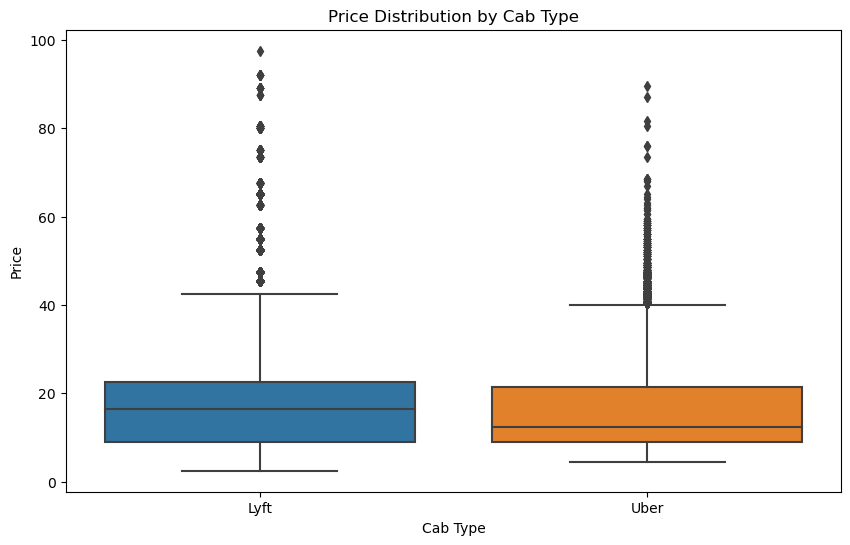

In [70]:
# membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cab_type', y='price', data=df)

plt.title('Price Distribution by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()

Berdasarkan box plot diatas, terlihat bahwa keduanya memiliki outlier. Tetapi, dapat dilihat juga bahwa Uber memiliki outlier yang lebih besar dibandingkan dengan Lyft sesuai dengan hasil median dan mean yang kita analisa diatas.

### B. Melihat perbandingan tipe layanan dari masing-masing Uber dan Lyft.

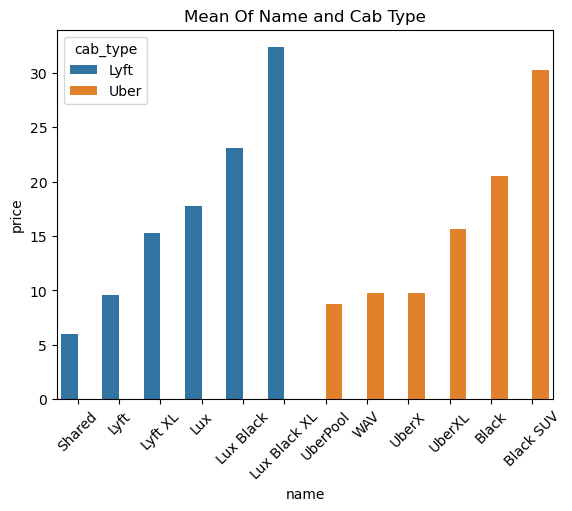

In [71]:
# Membuat visualisasi dengan cara pertama-tama mengelompokkan berdasarkan variabel layanan dan melakukan perhitungan mean
layanan = df.groupby(['cab_type', 'name'])['price'].mean().reset_index().sort_values(by=["cab_type", "price"], ascending=True)
ax = sns.barplot(data=layanan, x='name', y='price', hue='cab_type')
plt.xticks(rotation=45)
plt.title("Mean Of Name and Cab Type")
plt.xlabel("name")
plt.ylabel("price")

# Memunculkan visualisasi
plt.show()

Dapat terlihat bahwa Uber memiliki 6 layanan yaitu Black SUV, Black, UberXL, UberX, WAV dan UberPool. Dengan layanan Black SUV memiliki rata-rata harga tertinggi dan UberPool merupakan layanan dengan harga rata-rata terendah. Sedangkan, Lyft memiliki Shared, Lyft, Lyft XL, Lux, Lux Black dan Lux Black XL, dengan layanan termurah adalah Shared dan yang termahal adalah Lux Black XL.

### C. Melihat harga perhari dalam satu bulan

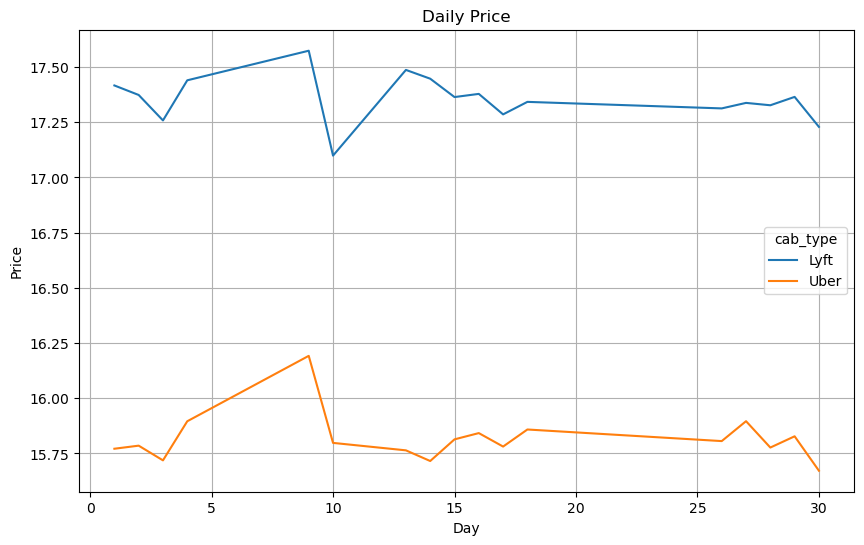

In [72]:
# melakukan pengelompokan berdasarkan 'day' dan 'cab_type' untuk menghitung mean dari 'price'
grouped = df.groupby(['day', 'cab_type'])['price'].mean().unstack()

# membuat visualisasi
grouped.plot(kind='line', figsize=(10, 6))

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Daily Price')

plt.grid(True)
plt.show()

Terlihat dari visualisasi diatas bahwa pada Lyft dan Uber terdapat lonjakan harga pada sekitar hari ke-8 pada satu bulan, lalu mengalami penurunan harga pada hari ke-10. Dapat dilihat juga bahwa keduanya mengalami penurunan harga pada hari 30.

### D. Membandingkan data Uber dan Lyft.

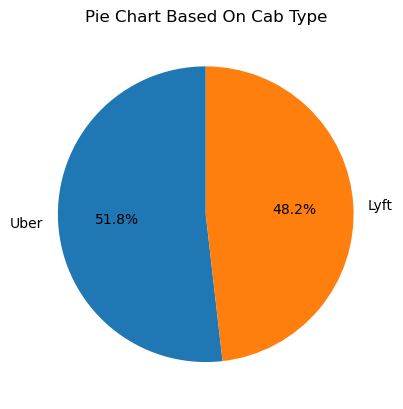

In [73]:
# Menghitung frekuensi masing-masing nilai dalam kolom 'cab_type'
cab_type_counts = df['cab_type'].value_counts()

# Membuat pie chart
cab_type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart Based On Cab Type')
plt.ylabel('')  # Menghilangkan label sumbu y
plt.show()

Dari Pie Chart diatas terlihat bahwa Uber memiliki lebih banyak data sekitar 51.8% dibandingkan Lyft yang memiliki hanya 48.2%.

## 5. Feature Engineering

### A. Melakukan pencarian korelasi

In [74]:
# membuat dataframe baru
df2 = df.copy()
df2

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the evening.",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331

### Mencari korelasi antara 'price' dengan kolom-kolom weather.

In [75]:
# membuat dataframe baru untuk mengelompokan kolom yang berhubungan dengan weather
df2_weather = df2[['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust','windGustTime', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase',
       'precipIntensityMax','uvIndexTime']]
df2_weather

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime
0,5.0,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600
1,11.0,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600
2,7.0,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000
3,26.0,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200
4,9.0,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600
693066,13.0,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600
693067,9.5,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600
693069,27.0,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600


<Axes: >

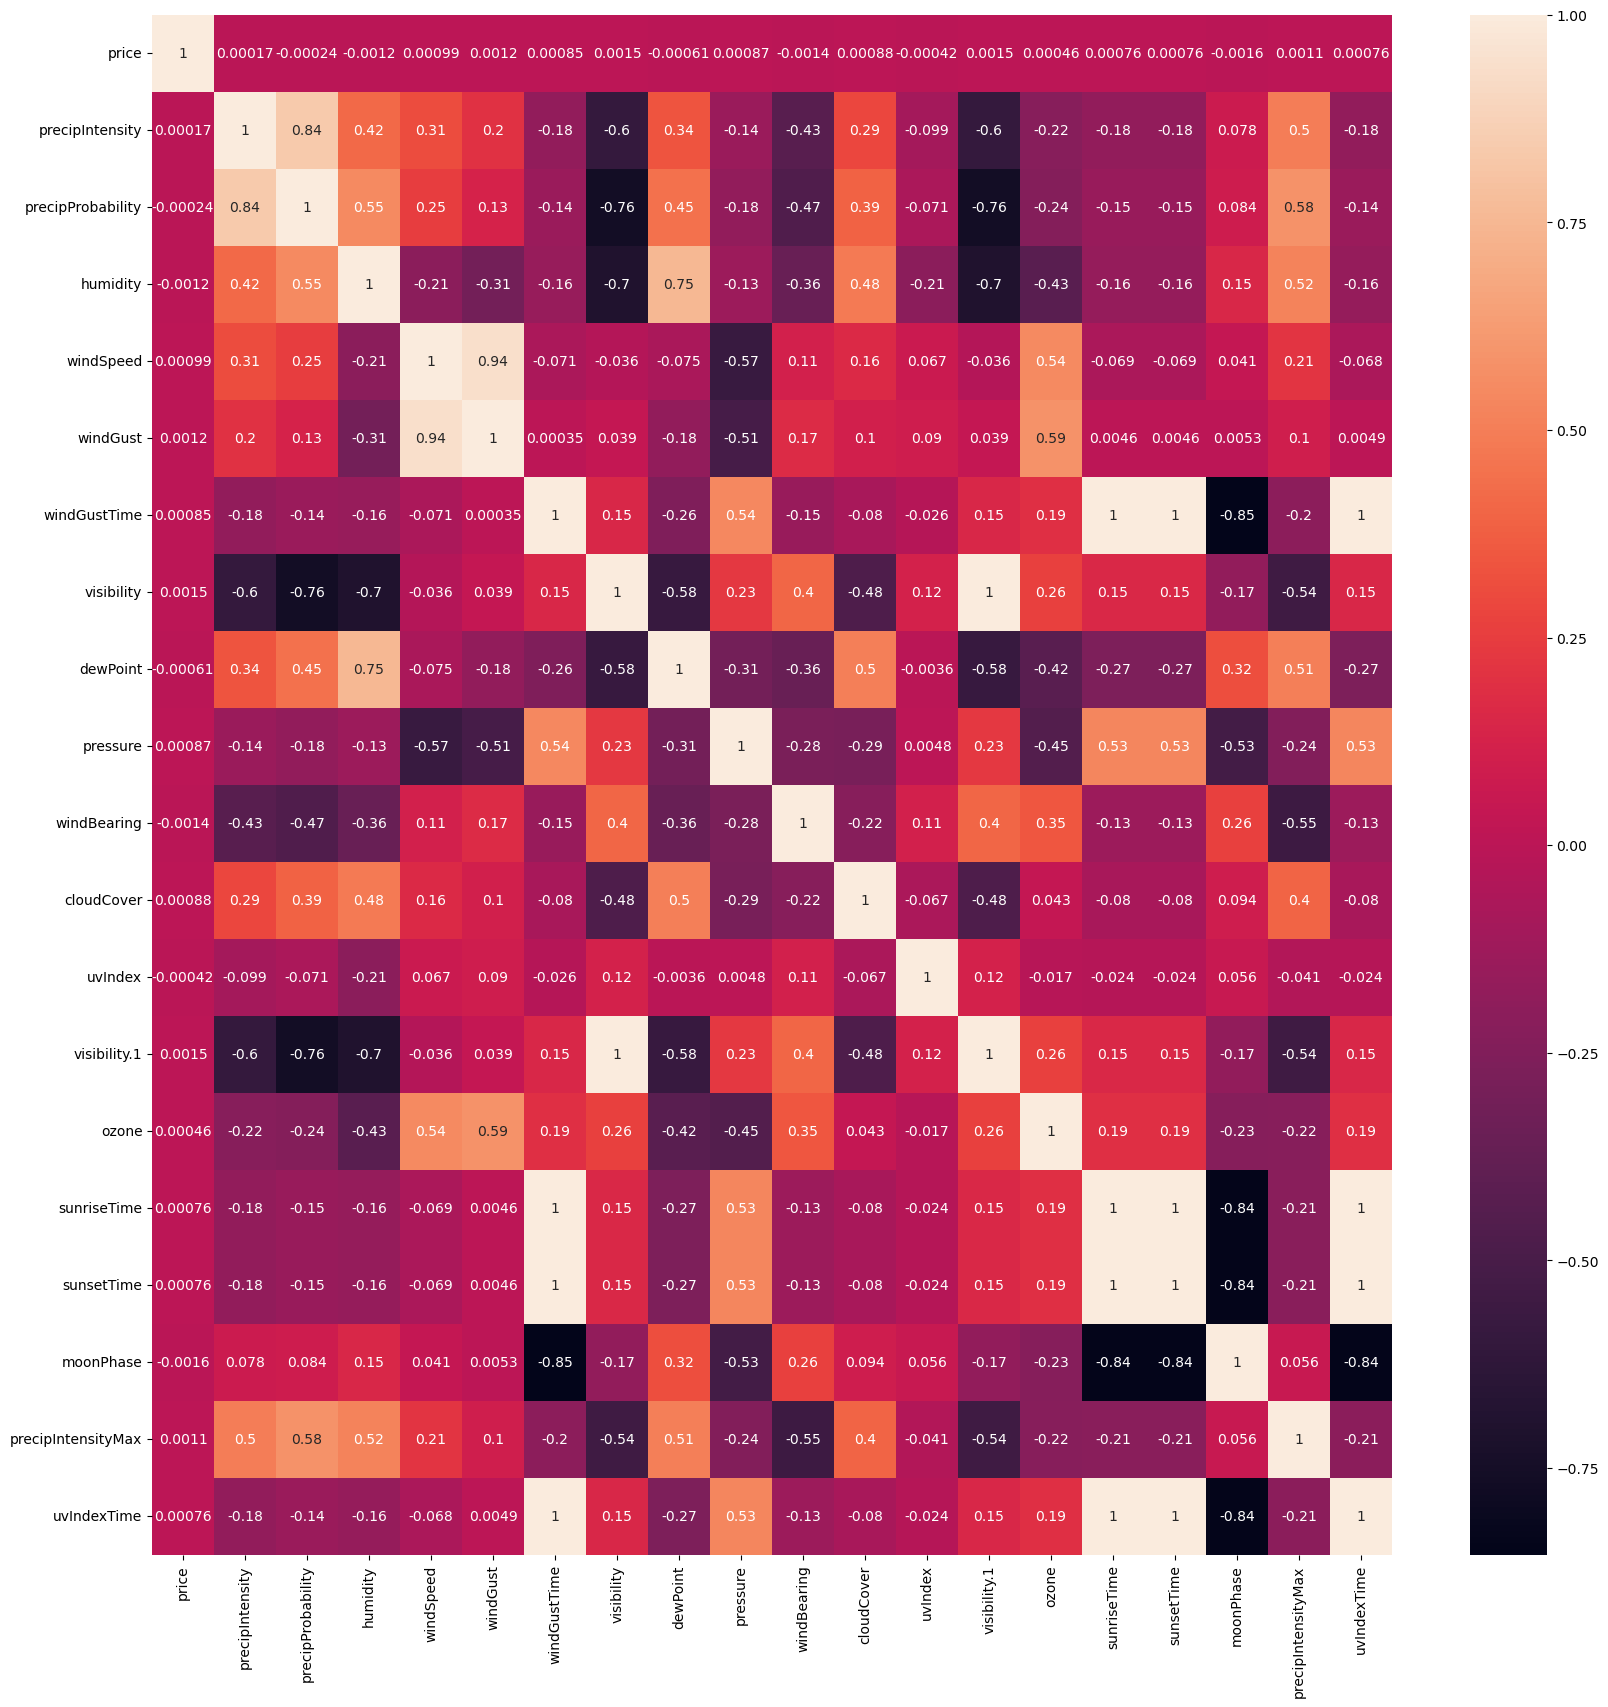

In [76]:
# membuat heatmap dan mencari korelasi menggunakan pearson
plt.figure(figsize=(20,20))
sns.heatmap(df2_weather.corr(method='pearson'),annot=True)

Dari heatmap diatas kita bisa melihat bahwa kolom-kolom weather memiliki nilai korelasi tidak mendekati 1 yang berarti tidak memiliki korelasi dengan kolom 'price'.

### Mencari korelasi antara 'price' dengan kolom-kolom temperature.

In [77]:
# membuat dataframe baru untuk mengelompokan kolom yang berhubungan dengan temperature
df2_temp = df2[['price','temperature','apparentTemperature','temperatureHigh','temperatureHighTime','temperatureLow',
            'temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime',
            'apparentTemperatureLow','apparentTemperatureLowTime','temperatureMin','temperatureMinTime',
            'temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime',
            'apparentTemperatureMax','apparentTemperatureMaxTime']]

df2_temp

,price,temperature,apparentTemperature,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,5.0,42.34,37.12,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,11.0,43.58,37.35,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,7.0,38.33,32.93,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,26.0,34.38,29.63,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,9.0,37.44,30.88,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,37.05,37.05,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,13.0,37.05,37.05,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,9.5,37.05,37.05,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,27.0,37.05,37.05,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


<Axes: >

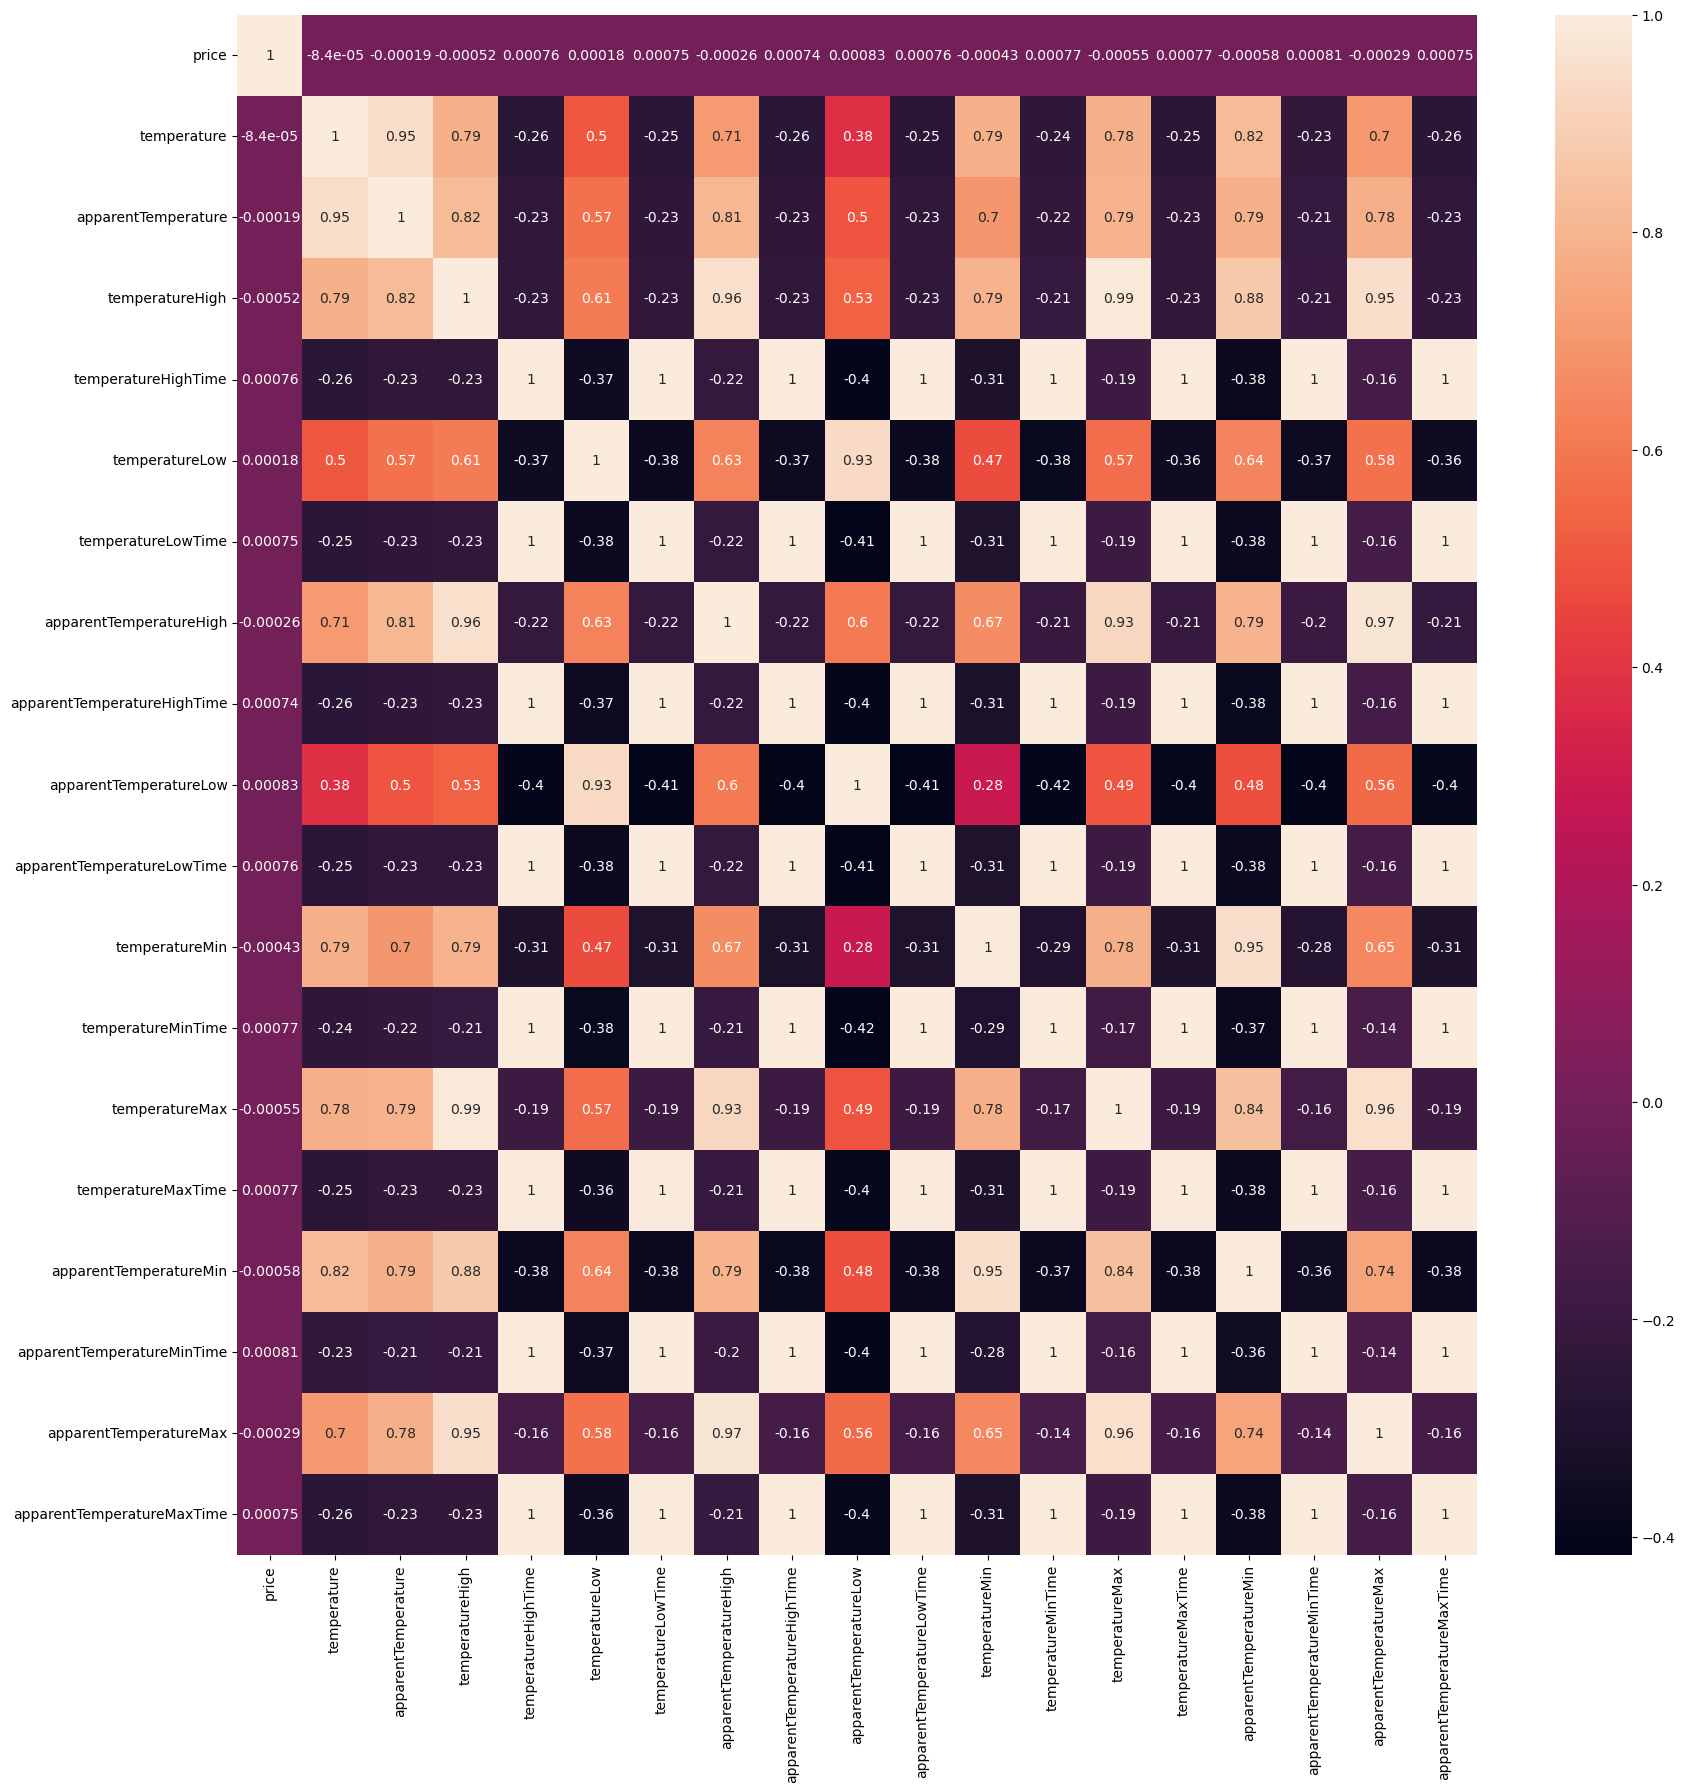

In [78]:
# membuat heatmap dan mencari korelasi menggunakan pearson
plt.figure(figsize=(20,20))
sns.heatmap(df2_temp.corr(method='pearson'),annot=True)

Dari visualisasi heatmap diatas kita dapat melihat bahwa korelasi kolom-kolom temperature dengan kolom price memiliki nilai korelasi tidak mendekati 1, yang menyatakan bahwa tidak terdapat korelasi antara mereka. Berarti, perubahan terhadap temperature tidak memiliki korelasi dengan perubahan harga.

### Mencari korelasi antara kolom 'price' dengan kolom lain.

In [79]:
# membuat dataframe baru untuk mengelompokan kolom numerical
df2_other = df2[['price','hour','day','month', 'distance','surge_multiplier',
                 'latitude','longitude']]
df2_other

,price,hour,day,month,distance,surge_multiplier,latitude,longitude
0,5.0,9,16,12,0.44,1.0,42.2148,-71.0330
1,11.0,2,27,11,0.44,1.0,42.2148,-71.0330
2,7.0,1,28,11,0.44,1.0,42.2148,-71.0330
3,26.0,4,30,11,0.44,1.0,42.2148,-71.0330
4,9.0,3,29,11,0.44,1.0,42.2148,-71.0330
...,...,...,...,...,...,...,...,...
693065,9.5,23,1,12,1.00,1.0,42.3519,-71.0643
693066,13.0,23,1,12,1.00,1.0,42.3519,-71.0643
693067,9.5,23,1,12,1.00,1.0,42.3519,-71.0643
693069,27.0,23,1,12,1.00,1.0,42.3519,-71.0643


<Axes: >

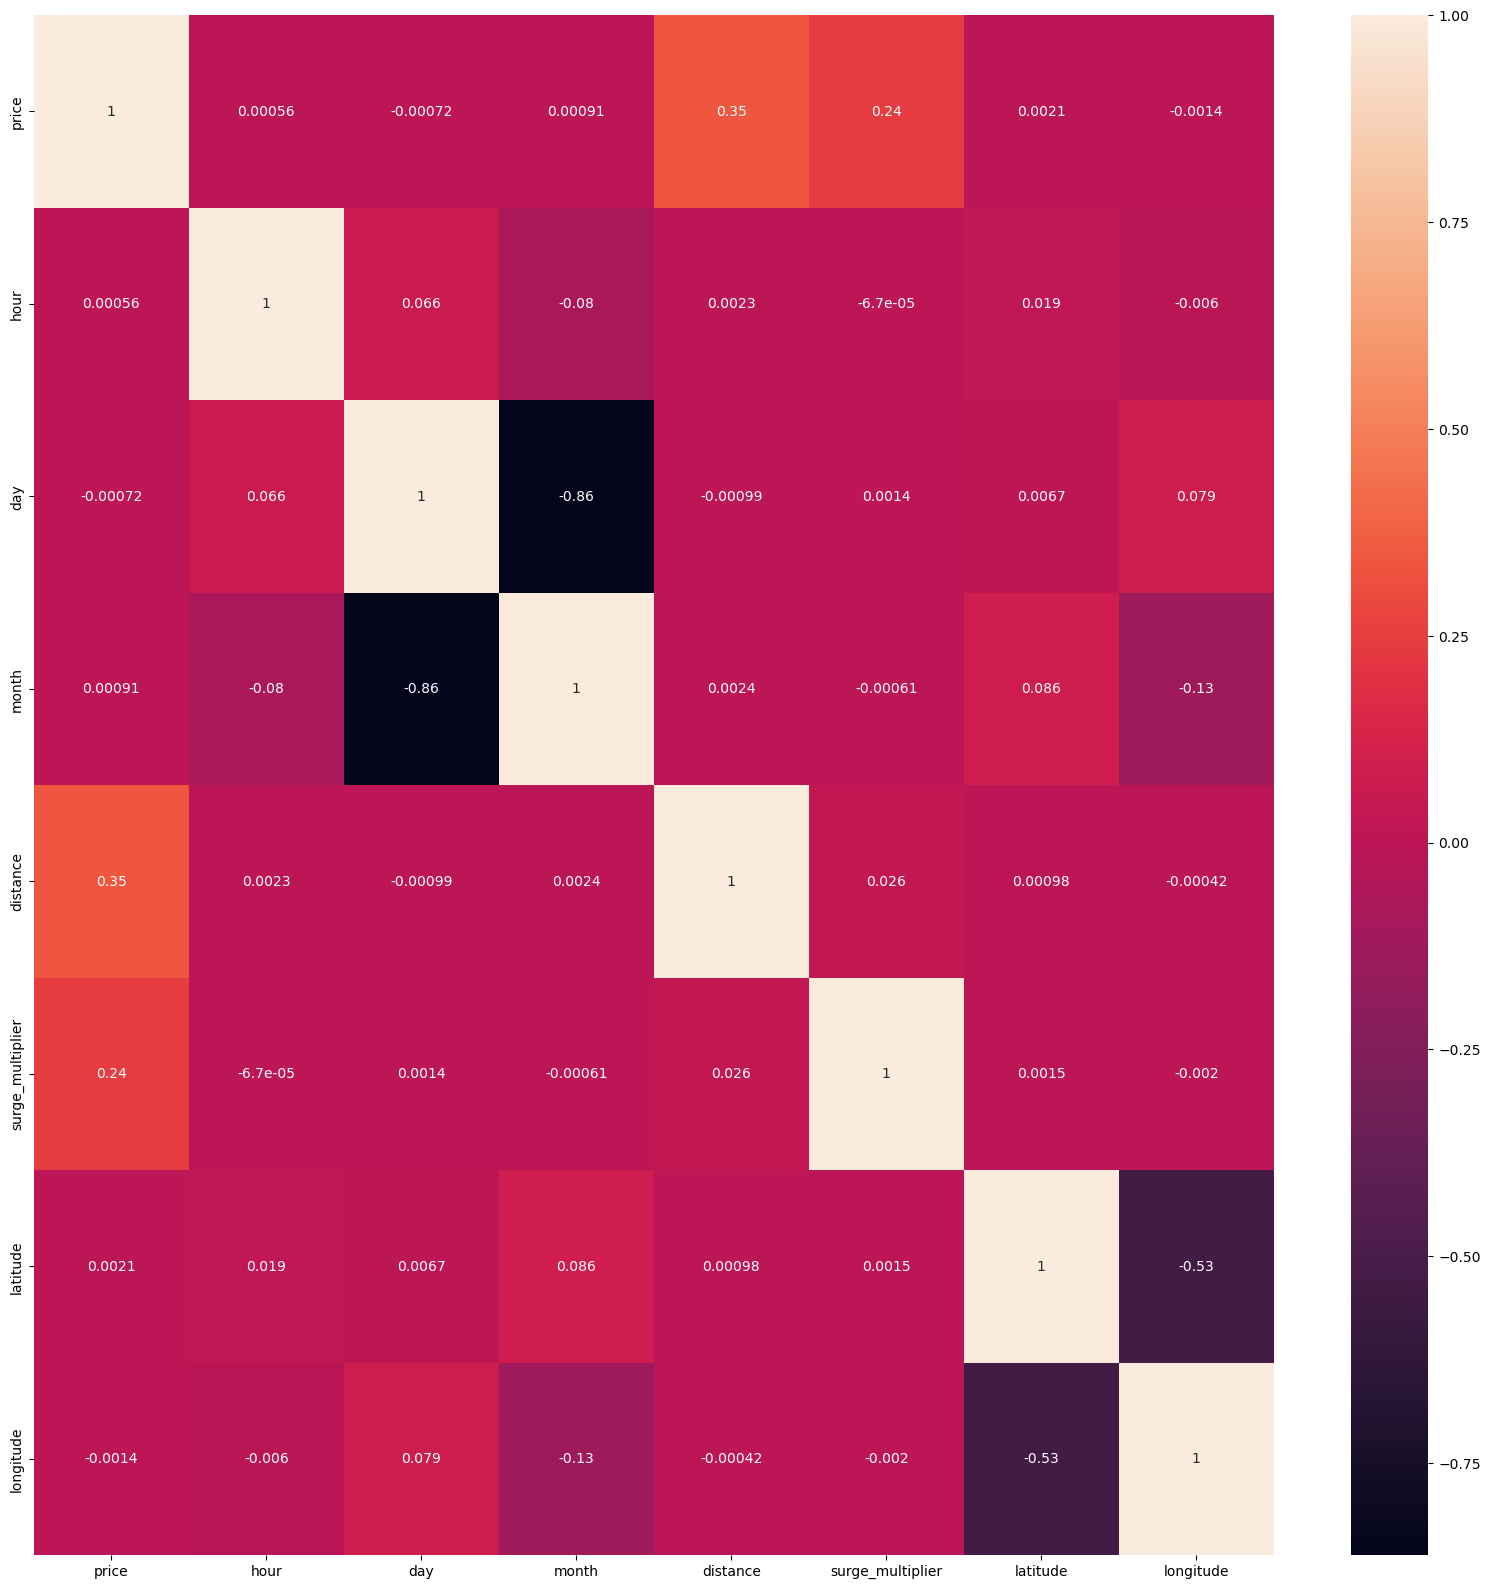

In [80]:
# membuat heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df2_other.corr(method='pearson'),annot=True)

Dari visualisasi diatas, kita bisa melihat bahwa kolom 'distance' memiliki nilai korelasi 0.35 dan kolom 'surge_mutlipier' memiliki nilai 0.24 yang berarti nilainya hampir mendekati 1. Dapat diambil kesimpulan bahwa 'distance' dan 'surge_mutlipier' memiliki korelasi dengan price. Kolom-kolom lain memiliki nilai korelasi dibawah jauh dibawah 1 yang berarti tidak memiliki korelasi.

### Mencari korelasi antara kolom 'price' dengan kolom kategorikal.

In [81]:
# membuat dataframe baru untuk mengelompokan kolom kategorikal
df2_cat = df2[['price','source','destination','cab_type','name','short_summary','long_summary','icon']]
df2_cat

,price,source,destination,cab_type,name,short_summary,long_summary,icon
0,5.0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,11.0,Haymarket Square,North Station,Lyft,Lux,Rain,"Rain until morning, starting again in the evening.",rain
2,7.0,Haymarket Square,North Station,Lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,26.0,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,9.0,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...,...,...,...,...,...
693065,9.5,West End,North End,Uber,WAV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693066,13.0,West End,North End,Uber,UberXL,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,9.5,West End,North End,Uber,UberX,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,27.0,West End,North End,Uber,Black SUV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


In [82]:
# mencari korelasi
for i in df2_cat.columns :
    corr_tau, pval_k = stats.kendalltau(df2_cat[i],df2_cat['price'])
    print(f"tau-correlation {i}: {corr_tau}, p-value: {pval_k}")

tau-correlation price: 1.0, p-value: 0.0
tau-correlation source: -0.013055772826511497, p-value: 2.3529257792795844e-49
tau-correlation destination: -0.03151675812702735, p-value: 2.33081827277028e-278
tau-correlation cab_type: -0.057004480669791274, p-value: 0.0
tau-correlation name: -0.39709440059363416, p-value: 0.0
tau-correlation short_summary: 0.00026118857283030585, p-value: 0.7781422430770276
tau-correlation long_summary: 0.0008231820404319457, p-value: 0.3689918246431466
tau-correlation icon: 0.0014072307863441582, p-value: 0.13075349023039154


Hasil perhitungan korelasi menggunakan kendalltau diketahui bahwa dari hasil value tau-correlation dan p-value hanya kolom 'name' dan 'cab_type' yang memiliki nilai korelasi kuat dengan kolom price sehingga bisa digunakan sebagai feature.

In [83]:
# membuat dataframe yang berisi feature
df3 = df2[['cab_type','name', 'distance', 'surge_multiplier', 'price']]
df3

,cab_type,name,distance,surge_multiplier,price
0,Lyft,Shared,0.44,1.0,5.0
1,Lyft,Lux,0.44,1.0,11.0
2,Lyft,Lyft,0.44,1.0,7.0
3,Lyft,Lux Black XL,0.44,1.0,26.0
4,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...
693065,Uber,WAV,1.00,1.0,9.5
693066,Uber,UberXL,1.00,1.0,13.0
693067,Uber,UberX,1.00,1.0,9.5
693069,Uber,Black SUV,1.00,1.0,27.0


Membuat sebuah dataframe baru dan menyisakan hanya 5 kolom saja.

### Melakukan Handling Cardinality

In [84]:
# Untuk mencari cardinality pada kolom kategorikal
pd.set_option('display.max_colwidth', None)

cat_cols = list(df3.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df3[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique',], data=listItem)

,nama kolom,jumlah nilai unique
0,cab_type,2
1,name,12


Dari hasil di atas dapat dilihat bahwa kolom 'cab_type' dan 'name' merupakan low cardinality.

### B. Split antara X (Features) dan y (target)

In [85]:
#Splitting antara 'X' dan 'y'

X = df3.drop(['price'], axis = 1)
y = df3['price']
X

,cab_type,name,distance,surge_multiplier
0,Lyft,Shared,0.44,1.0
1,Lyft,Lux,0.44,1.0
2,Lyft,Lyft,0.44,1.0
3,Lyft,Lux Black XL,0.44,1.0
4,Lyft,Lyft XL,0.44,1.0
...,...,...,...,...
693065,Uber,WAV,1.00,1.0
693066,Uber,UberXL,1.00,1.0
693067,Uber,UberX,1.00,1.0
693069,Uber,Black SUV,1.00,1.0


In [86]:
#Splitting antara train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (510380, 4)
Test Size:  (127596, 4)


Setelah dilakukan splitting, terdapat jumlah data train sebanyak 510380 dan jumlah data test sebanyak 127596

### Handling Missing Values

In [87]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

cab_type            0
name                0
distance            0
surge_multiplier    0
dtype: int64
cab_type            0
name                0
distance            0
surge_multiplier    0
dtype: int64
0
0


Setelah dilakukan pengecekan tidak terdapat missing values.

In [88]:
# Melakukan pengelompokan berdasarkan kolom kategorikal dan numerikal
column_cat = ['cab_type', 'name']
column_num = ['distance','surge_multiplier']

In [89]:
# Membuat variabel baru untuk data kategorikal dan numerikal
X_train_cat = X_train[column_cat]
X_train_num = X_train[column_num]

X_test_cat = X_test[column_cat]
X_test_num = X_test[column_num]

X_train_cat

,cab_type,name
441294,Uber,Black SUV
671777,Uber,UberX
30765,Uber,WAV
320099,Uber,Black SUV
105126,Uber,UberPool
...,...,...
500045,Uber,WAV
4241,Uber,UberXL
604200,Lyft,Lyft XL
310474,Uber,UberPool


### Outlier Handling

In [90]:
# mencari skewness
X_train_num.skew()

distance            0.818398
surge_multiplier    8.004747
dtype: float64

Dari hasil diatas dapat diketahui bahwa skewness pada kolom 'distance' menunjukkan bahwa distribusi data pada 'distance' cenderung condong ke kanan dan positif. Nilai skewness kolom 'surge_multiplier' sebesar 8.004747 sangat tinggi. Skewness positif yang tinggi menunjukkan distribusi yang sangat miring ke kanan untuk kolom "surge_multiplier". 

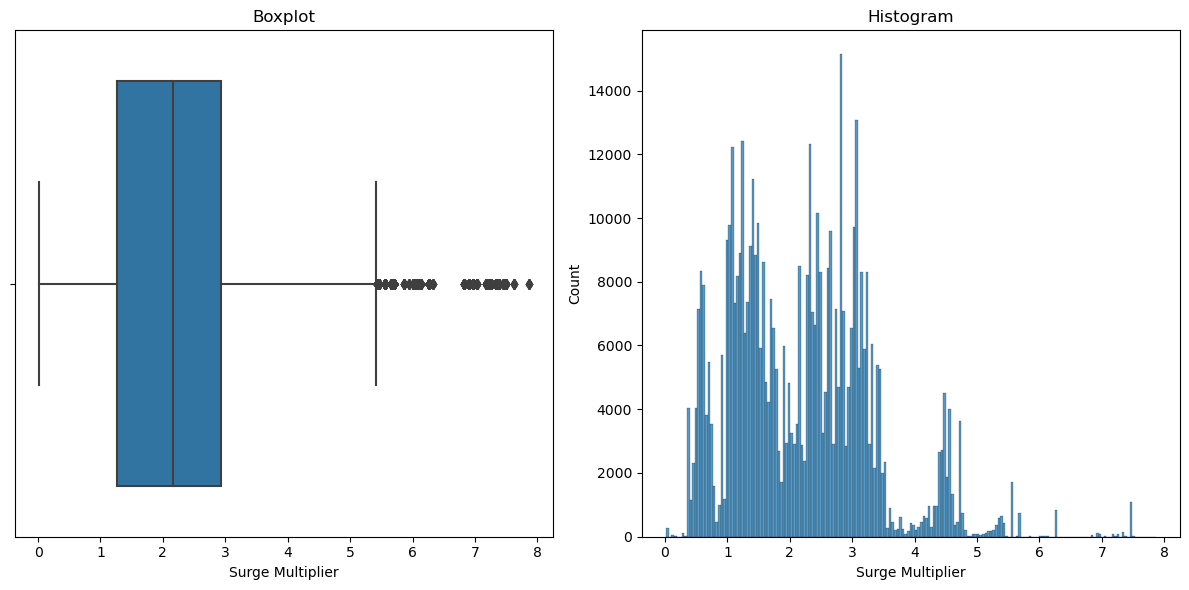

In [91]:
# membuat boxplot dan histogram untuk melihat outlier dan distribusi data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.boxplot(x=X_train['distance'])
plt.xlabel('Surge Multiplier')
plt.title('Boxplot')

plt.subplot(1, 2, 2)

sns.histplot(x=X_train['distance'])
plt.xlabel('Surge Multiplier')
plt.title('Histogram')

plt.tight_layout()

plt.show()

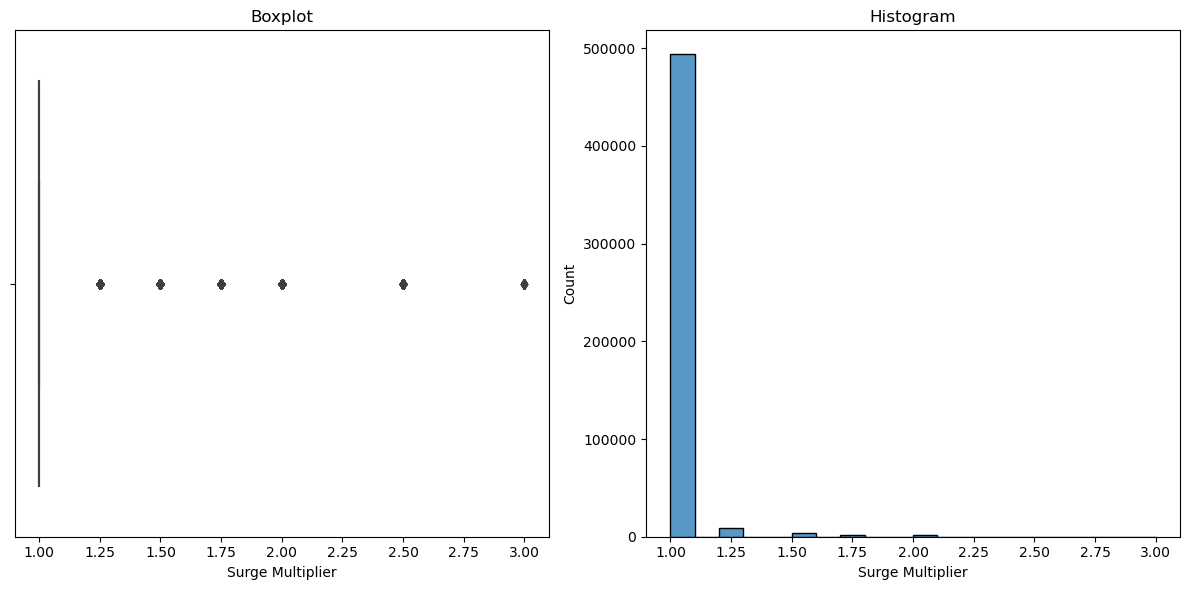

In [92]:
# membuat boxplot dan histogram untuk melihat outlier dan distribusi data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.boxplot(x=X_train['surge_multiplier'])
plt.xlabel('Surge Multiplier')
plt.title('Boxplot')

plt.subplot(1, 2, 2)

sns.histplot(x=X_train['surge_multiplier'])
plt.xlabel('Surge Multiplier')
plt.title('Histogram')

plt.tight_layout()

plt.show()

Kita bisa melihat bahwa meskipun pada kolom 'surge_multiplier' terdapat banyak outlier dan data tidak terdistribusi dengan normal, variancenya rendah sehingga tidak bisa kita lakukan capping.
Sedangkan untuk distance, bisa dilihat pada boxplot terdapat outlier dan data tidak terdistribusi secara normal dan akan kita lakukan capping karena variancenya tinggi.

In [93]:
# melakukan capping menggunakan winsorizer
winsoriser_distance = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['distance'])

winsoriser_distance.fit(X_train_num)

x_traincap = winsoriser_distance.transform(X_train_num)
x_testcap = winsoriser_distance.transform(X_train_num)
winsoriser_distance.right_tail_caps_

{'distance': 5.42}

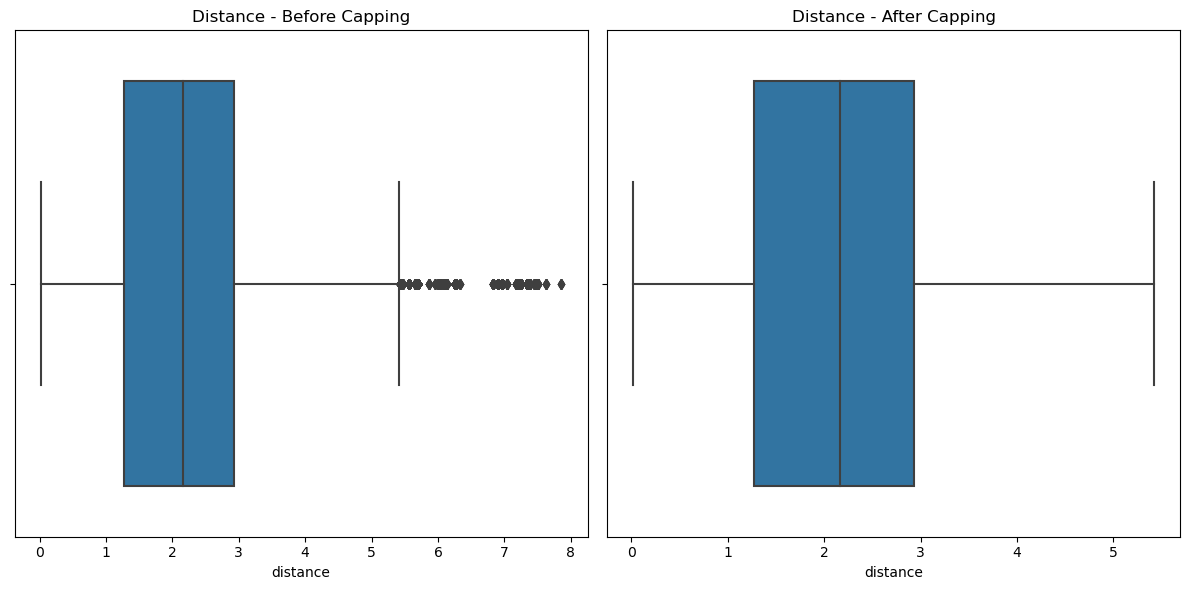

In [94]:
# melihat perbedaan 'distance' sebelum dan sesudah capping
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['distance'])
plt.title('Distance - Before Capping')

plt.subplot(1, 2, 2)
sns.boxplot(x=x_traincap['distance'])
plt.title('Distance - After Capping')

plt.tight_layout()

plt.show()

Terlihat sebelum dan sesudah dilakukan capping sekarang data terdistribusi lebih normal

### Melakukan Cek VIF

In [95]:
#Mengkalkulasi VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [112]:
# Memunculkan nilai vif
calc_vif(X_train_num)

,variables,VIF
0,distance,4.609177
1,surge_multiplier,4.609177


Table di atas memperlihatkan multicollinearity dari feature. Jika nilai VIF suatu feature lebih besar dari 5 dapat disimpulkan bahwa feature tersebut saling bergantung dengan nilai feature lainnya. Dari hasil diatas tidak terlihat kolom yang memiliki nilai vif lebih dari 5.

### Encoding

In [97]:
# meload data
X_train_cat

,cab_type,name
441294,Uber,Black SUV
671777,Uber,UberX
30765,Uber,WAV
320099,Uber,Black SUV
105126,Uber,UberPool
...,...,...
500045,Uber,WAV
4241,Uber,UberXL
604200,Lyft,Lyft XL
310474,Uber,UberPool


In [98]:
# melakukan one hot encoding
ohc = OneHotEncoder(sparse_output=False)
X_train_cat_encode=ohc.fit_transform(X_train_cat[['cab_type', 'name']])
X_test_cat_encode=ohc.transform(X_test_cat[['cab_type', 'name']])


X_train_cat=X_train_cat[['cab_type', 'name']]
X_test_cat=X_test_cat[['cab_type', 'name']]


X_train_cat_encoded=pd.DataFrame(X_train_cat_encode,columns=ohc.get_feature_names_out(X_train_cat.columns))
X_test_cat_encoded=pd.DataFrame(X_test_cat_encode,columns=ohc.get_feature_names_out(X_test_cat.columns))

In [99]:
# membuat variabel baru untuk kolom yang sudah dilakukan encode
column_cat2=X_train_cat_encoded.select_dtypes(include = np.number).columns.tolist()

In [100]:
# meload data
X_train_cat_encoded

,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510376,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
510377,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
510378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Scaling

In [101]:
# melakukan scaling
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.08859348, -0.15752999],
       [-0.9590562 , -0.15752999],
       [-0.55408237, -0.15752999],
       ...,
       [ 0.83691468, -0.15752999],
       [-0.06107076, -0.15752999],
       [-0.69494283, -0.15752999]])

Melakukan scaling terhadap kolom dengan numerical

### Concate

In [102]:
# Concat X_train_final dan X_test_final
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

In [103]:
#simpan menjadi dataframe
X_train_final = pd.DataFrame(X_train_final,columns=[column_num+column_cat2])
X_test_final  = pd.DataFrame(X_test_final,columns=[column_num+column_cat2])

In [104]:
# meload data
X_train_final

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.088593,-0.15753,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.959056,-0.15753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.554082,-0.15753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.537586,-0.15753,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.686139,-0.15753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,-0.351595,-0.15753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510376,-1.390441,-0.15753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
510377,0.836915,-0.15753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
510378,-0.061071,-0.15753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 6. Model Definition

In [105]:
# membuat variabel untuk linear regression
model_lin_reg = LinearRegression()

## 7. Model Training

In [106]:
# Model Train

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [107]:
# Predict Train-set and Test-set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([30.56640021,  6.70281891,  7.99601974, ..., 17.28204057,
        8.5565031 ,  3.84440175])

## 8. Model Evaluation

In [108]:
# MAE
print('MAE - Train  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test   : ', mean_absolute_error(y_test, y_pred_test))

print('==========================================')

# MSE
print('MSE - Train  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test   : ', mean_squared_error(y_test, y_pred_test))

print('==========================================')

# RMSE
print('RMSE - Train  : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test   : ', mean_squared_error(y_test, y_pred_test, squared=False))

print('==========================================')

# R2 Score
print('R2 Score - Train  : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test   : ', r2_score(y_test, y_pred_test))



MAE - Train  :  1.7769543931117713
MAE - Test   :  1.7784783337951997
MSE - Train  :  6.321337406964314
MSE - Test   :  6.331062380470317
RMSE - Train  :  2.514226999887702
RMSE - Test   :  2.516160245387864
R2 Score - Train  :  0.9272412770492565
R2 Score - Test   :  0.9273910457150084


MAE = Merepresentasikan rata-rata perbedaan dari value asli dan hasil prediksi, dalam hal ini nilai dari train dan test hampir mirip yang mengindikasikan bahwa model membuat sebuah prediksi yang memiliki sedikit error.

MSE = Hampir mirip dengan MAE, MSE menunjukan perbedaan kuadrat rata-rata antara value asli dan prediksi. Hasil antara train dan test sangat dekat yang berarti terdapat hanya sedikit error.

RMSE = Nilai dari RMSE antara train dan test juga menunjukkan hasil yang hampir sama menunjukkan terdapat hanya sedikit error pada model.

R2 Score = Nilai dari R2 score yang mendekati hampir 1 yang pada hasil yang kita miliki mendapatkan nilai 0.92 menyatakan bahwa model memiliki tingkat akurasi yang sangat baik sekitar 92% dan dapat menjelaskan variasi dalam variabel sekitar 92%.

## 9. Model Saving

In [109]:
# menyimpan model yang sudah dibuat
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(column_num, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(column_cat, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(ohc, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

## 10. Model Inference

Untuk model inference terdapat pada file panji_putra_inference.ipynb

## 11. Conclusion

Setelah membuat model machine learning untuk memprediksi harga perjalanan platform ride hailing, kita dapat mengambil beberapa kesimpulan:  
1. Dari total 57 kolom yang ada, kita hanya mengambil 4 kolom yang dijadikan feature yaitu 'cab_type','name', 'distance', 'surge_multiplier' dan 1 kolom yang dijadikan target yaitu 'price'.  

2. Setelah dilakukan evaluasi dapat dilihat bahwa nilai hasil evaluasi model yang dibuat mendapatkan nilai yang mayoritas baik terutama pada R2 score yang mendapatkan nilai akurasi hingga 92%.  

3. Dari hasil analisa juga dapat disimpulkan bahwa harga perjalanan dapat dipengaruhi oleh jenis taxi ('cab_type'), tipe layanan ('name), jarak ('distance') dan juga kenaikan tarif('surge_multiplier'). Yang artinya jika terdapat perubahan nilai pada masing-masing kolom tersebut akan berkontribusi pada harga perjalanan yang diprediksi. 

## Conceptual Problems

Intercept: adalah nilai prediksi ketika semua feature diatur pada nilai 0. Nilai intercept pada model ini sebesar 16.56.  Dalam hal ini, ketika semua input dijadikan 0 nilai interceptnya adalah 16.56.

Slope: adalah koefisien yang mencerminkan seberapa banyak nilai variabel dependen (yang ingin diprediksi) diharapkan berubah ketika variabel independen (yang digunakan untuk membuat prediksi) mengalami perubahan satu unit.

Distance: Jarak perjalanan (distance) memiliki koefisien positif sebesar 3.18, menunjukkan bahwa semakin jauh jarak perjalanan, nilai prediksi juga cenderung meningkat.  

Surge Multiplier: Koefisien surge multiplier positif (1.75) mengindikasikan bahwa adanya kenaikan tarif (surge) akan berkontribusi pada peningkatan nilai prediksi.  

Cab Type: (Lyft, Uber): Berdasarkan tipe cab, terlihat bahwa beberapa tipe cab Lyft (Lyft, Lyft XL, Shared) memiliki dampak negatif pada nilai prediksi, sementara tipe cab Uber (Uber, UberXL, WAV) cenderung memiliki dampak positif. Namun, perlu diingat bahwa pengaruh ini bisa berbeda tergantung pada variabel lainnya.  

Name: (Black, Black SUV, Lux, dll.): Layanan seperti Black, Black SUV, Lux, dan Lux Black XL memiliki koefisien positif yang signifikan, menunjukkan bahwa penggunaan layanan ini berkontribusi secara positif terhadap nilai prediksi. Sebaliknya, Layanan Lyft dan Shared memiliki dampak negatif yang cukup besar.